In [ ]:
def stringToArray(originalString):
  resultList = []
  temp = []
  flag = 0
  flag2 = 0
  for i in range(len(originalString)):
      if (originalString[i]=="," or originalString[i]=="{" or i == 0 or flag == 1):
        flag = 0
        if (originalString[i] == "{"):
          flag2 = 1
        continue
      elif (originalString[i]=="}"):
        resultList.append(temp)
        temp = []
        flag2 = 0
      elif (originalString[i]=="q"):
        temp.append(originalString[i:i+2])
        flag = 1
      elif (originalString[i-1]=="," and (originalString[i+1]=="," or originalString[i+1]==")") and flag2 == 0):
          resultList.append(originalString[i])
      else:
        temp.append(originalString[i])
  if (temp) :
    resultList.append(temp[0])
  return resultList





# Example usage:
original_string = "({a,b},{0,1},{q0,q1,q2},f,g,q0)"
resultList = stringToArray(original_string)


if resultList:
    print(resultList)
else:
    print("No matches found.")


Transitions = []
temp = []
for i in range(len(resultList[2])):
  for j in range (len(resultList[0])):
    print("f("+resultList[2][i]+","+resultList[0][j]+")")
    x = input("State:")
    y = input("Output:")
    temp.append(resultList[2][i])
    temp.append(resultList[0][j])
    temp.append(x)
    temp.append(y)
    Transitions.append(temp)
    temp = []

print(Transitions)


[['a', 'b'], ['0', '1'], ['q0', 'q1', 'q2'], 'f', 'g', 'q0']
f(q0,a)
State:q0
Output:0
f(q0,b)
State:q1
Output:1
f(q1,a)
State:q2
Output:0
f(q1,b)
State:q1
Output:1
f(q2,a)
State:q0
Output:0
f(q2,b)
State:q1
Output:1
[['q0', 'a', 'q0', '0'], ['q0', 'b', 'q1', '1'], ['q1', 'a', 'q2', '0'], ['q1', 'b', 'q1', '1'], ['q2', 'a', 'q0', '0'], ['q2', 'b', 'q1', '1']]


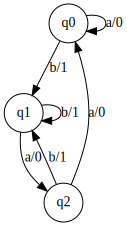

In [ ]:
from graphviz import Digraph

fst = Digraph()

for i in range(len(resultList[2])):
  fst.node(resultList[2][i], resultList[2][i], shape = "circle")

for i in range(len(Transitions)):
  fst.edge(Transitions[i][0], Transitions[i][2], Transitions[i][1] + "/" + Transitions[i][3])

fst


Formal Definition of DFA:
[['q0', 'q1', 'q2'], ['a', 'b'], [['q0', 'a', 'q0'], ['q0', 'b', 'q1'], ['q1', 'a', 'q2'], ['q1', 'b', 'q1'], ['q2', 'a', 'q0'], ['q2', 'b', 'q1']], 'q0', ['q1']]


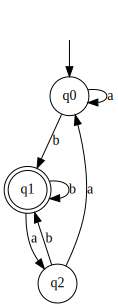

In [ ]:
def checkStates(Transitions):
  final = []
  nonFinal = []
  flag = 0
  for i in range(len(Transitions)):
    temp = Transitions[i]
    found = (temp[2] in nonFinal) or (temp[2] in final)
    if (temp[3] == '0' and not found) :
      for j in Transitions:
        if ((temp[2] == j[2]) and (j[3] != '0')):
          flag = 1
          break
      if (flag == 0):
        nonFinal.append(temp[2])
    elif (temp[3] == '1' and not found):
      for j in Transitions:
        if ((temp[2] == j[2]) and (j[3] != '1')):
          flag = 1
          break
      if (flag == 0):
        final.append(temp[2])
  return final, nonFinal


final, nonFinal = checkStates(Transitions)
dfa = Digraph()
dfaDefinition = []
if (len(final) + len(nonFinal) != len(resultList[2]) or (resultList[1]!=['1','0'] and resultList[1]!=['0','1'])):
  print("FST can not be converted to DFA")
else:
  dfa.node(" ", color = "white")
  for i in range(len(resultList[2])):
    if (resultList[2][i] in nonFinal):
      dfa.node(resultList[2][i], resultList[2][i], shape = "circle")
    elif (resultList[2][i] in final):
      dfa.node(resultList[2][i], resultList[2][i], shape = "doublecircle")
  dfa.edge(" ", resultList[5])
  for i in range(len(Transitions)):
    dfa.edge(Transitions[i][0], Transitions[i][2], Transitions[i][1])
  transition = []
  for i in range(len(Transitions)):
    transition.append(Transitions[i][0:(len(Transitions[i])-1)])


  dfaDefinition.append(resultList[2])
  dfaDefinition.append(resultList[0])
  dfaDefinition.append(transition)
  dfaDefinition.append(resultList[5])
  dfaDefinition.append(final)
  print("Formal Definition of DFA:")
  print(dfaDefinition)

dfa

In [ ]:
def acceptStringDFA(inputString, dfaDef):
  currentState = dfaDef[3]
  for s in inputString:
    for t in dfaDef[2]:
      if (currentState == t[0] and s == t[1]):
        currentState = t[2]
        break
  if currentState in dfaDef[4]:
    return "Accepted"
  else:
    return "Rejected"

print(acceptStringDFA("abbbababaabaab",dfaDefinition))

Accepted


In [ ]:
def outputStringFST(inputString, FSTDef, Transitions):
  currentState = FSTDef[5]
  outputString = ""
  for s in inputString:
    for t in Transitions:
      if (currentState == t[0] and s == t[1]):
        outputString = outputString + t[3]
        currentState = t[2]
        break
  return outputString

print(outputStringFST("abbbababaabaab", resultList, Transitions))


01110101001001
